3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

1. Data Exploration and Understanding:

• Dataset Overview:

1. Load the dataset and display the first 10 rows.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI/World_Happiness_Report.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [ ]:
print("Number of rows and column:", df.shape)

Number of rows and column: (143, 9)


3. List all the columns and their data types.

In [ ]:
print("All columns and data type", df.dtypes)


All columns and data type Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
print("Mean of score:", df["score"].mean())
print("Median of score:", df["score"].median())
print("Standard deviation of score:", df["score"].std())

Mean of score: 5.52758041958042
Median of score: 5.785
Standard deviation of score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
print("Country with highest happiness scores")
df.loc[df["score"].idxmax()]


Country with highest happiness scores


,0
Country name,Finland
score,7.741
Log GDP per capita,1.844
Social support,1.572
Healthy life expectancy,0.695
Freedom to make life choices,0.859
Generosity,0.142
Perceptions of corruption,0.546
Dystopia + residual,2.082


In [ ]:
print("Country with the lowest happiness socres")
df.loc[df["score"].idxmin()]

Country with the lowest happiness socres


,142
Country name,Afghanistan
score,1.721
Log GDP per capita,0.628
Social support,0.0
Healthy life expectancy,0.242
Freedom to make life choices,0.0
Generosity,0.091
Perceptions of corruption,0.088
Dystopia + residual,0.672


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
happiest_countries_by_socre = df[df["score"] > 7.5]
happiest_countries_by_socre

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
sorted_high= happiest_countries_by_socre.sort_values('Log GDP per capita', ascending=False).head(10)
print(sorted_high[['Country name', 'score', 'Log GDP per capita']])

  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


• Adding New Columns:

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low− (Score < 4)

Medium− (4 ≤ Score ≤ 6)

High− (Score > 6)

In [ ]:
conditions = [df['score'] < 4,df['score'].between(4, 6),df['score'] > 6]
choices = ['Low', 'Medium', 'High']
df['Happiness Category'] = np.select(conditions, choices, default='Unknown')
print(df[['Country name', 'score', 'Happiness Category']])


         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

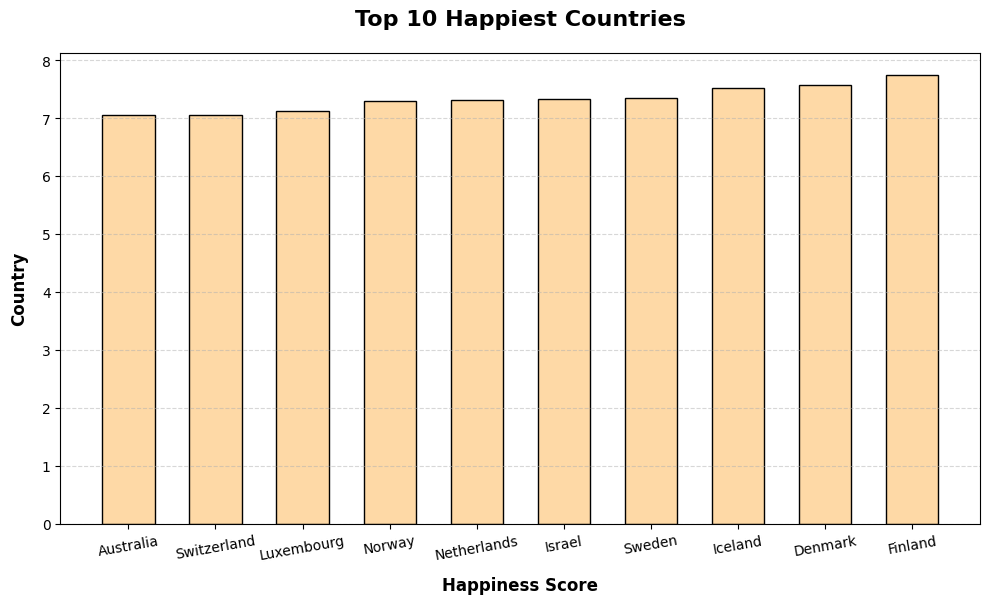

In [ ]:
top10 = df.nlargest(10, 'score').sort_values('score')
plt.figure(figsize=(10, 6))
plt.bar(top10['Country name'], top10['score'], edgecolor="black", color=plt.cm.Pastel1_r(0.5), width=0.6)
plt.xlabel('Happiness Score', fontsize=12, fontweight="bold", labelpad=10)
plt.ylabel('Country', fontsize=12, fontweight="bold", labelpad=10)
plt.title('Top 10 Happiest Countries', fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.xticks(rotation=10 , ha='center', fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()



• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.


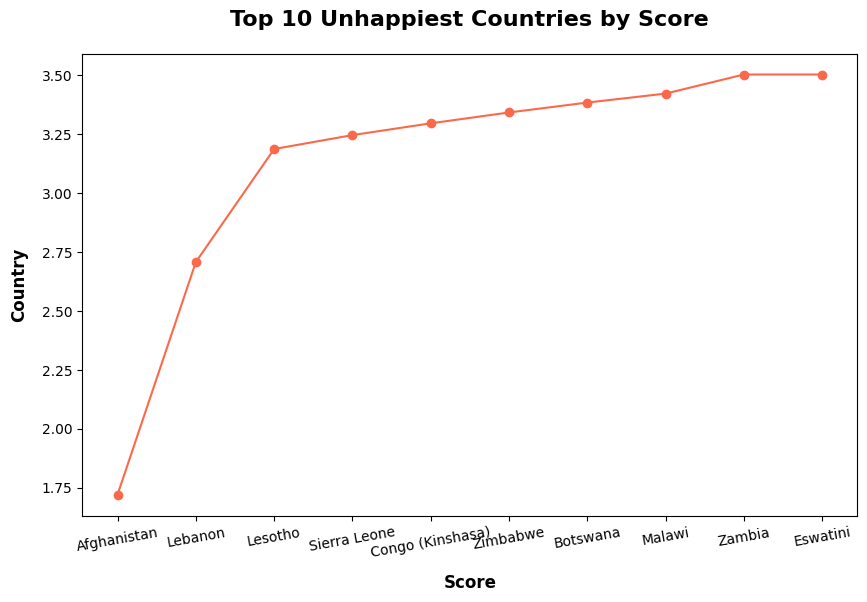

In [ ]:
bottom_10 = df.nsmallest(10, 'score')[['Country name', 'score']]
plt.figure(figsize=(10,6))
plt.plot(bottom_10['Country name'], bottom_10['score'],  marker='o', color=plt.cm.Reds(0.5))
plt.xlabel('Country', fontsize=12)
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16, fontweight="bold", pad=20)
plt.xlabel('Score', fontsize=12, fontweight="bold", labelpad=10)
plt.ylabel('Country',fontsize=12, fontweight="bold", labelpad=10)
plt.xticks(rotation=10, ha='center', fontsize=10)
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.


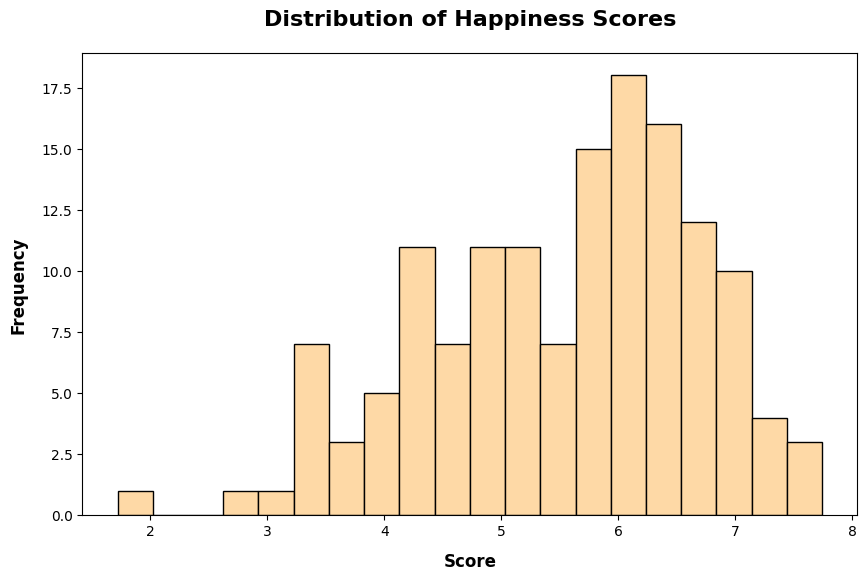

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['score'], bins=20, edgecolor='black', color=plt.cm.Pastel1(0.5))
plt.xlabel('Score', fontsize=12)
plt.title('Distribution of Happiness Scores', fontsize=16, fontweight="bold", pad=20)
plt.xlabel('Score', fontsize=12, fontweight="bold", labelpad=10)
plt.ylabel('Frequency', fontsize=12, fontweight="bold", labelpad=10)
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.


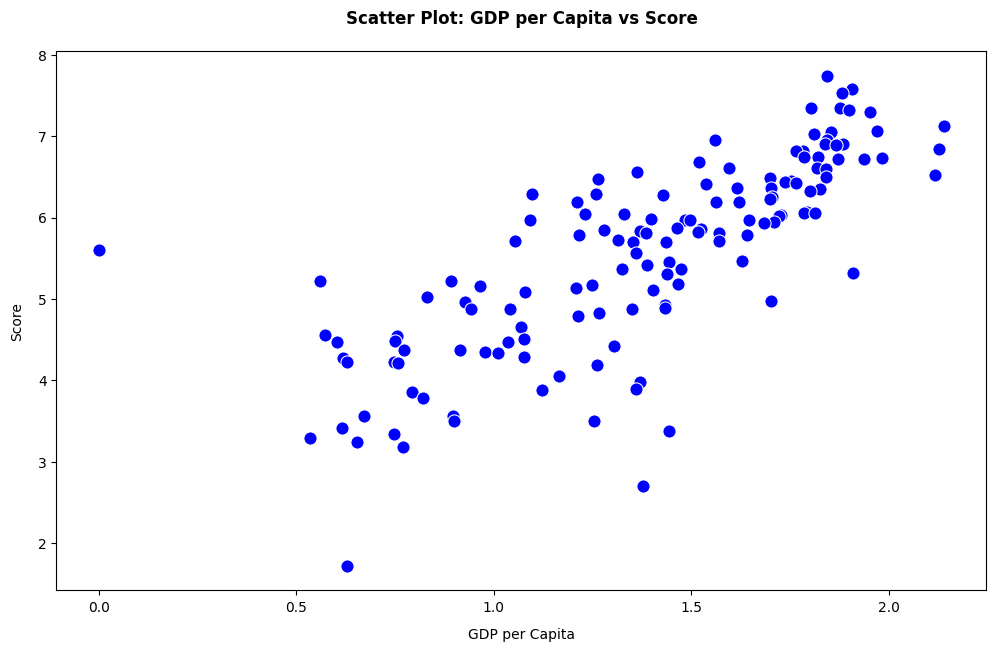

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x=df['Log GDP per capita'], y=df['score'], s=90, color='blue')
plt.title('Scatter Plot: GDP per Capita vs Score', pad=20, fontweight='bold')
plt.xlabel('GDP per Capita', labelpad=10)
plt.ylabel('Score', labelpad=10)
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asia_df.to_csv('/content/drive/MyDrive/AI/south_asia_happiness.csv', index=False)

Task - 2 - Composite Score Ranking:

Tasks:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [ ]:
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                   0.30 * south_asia_df['Social support'] +
                                   0.30 * south_asia_df['Healthy life expectancy'])
print(south_asia_df[['Country name', 'Composite Score']])


    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
south_asia_ranked = south_asia_df.sort_values('Composite Score', ascending=False)
print(south_asia_ranked[['Country name', 'Composite Score', 'score']])

    Country name  Composite Score  score
127    Sri Lanka           1.0739  3.898
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

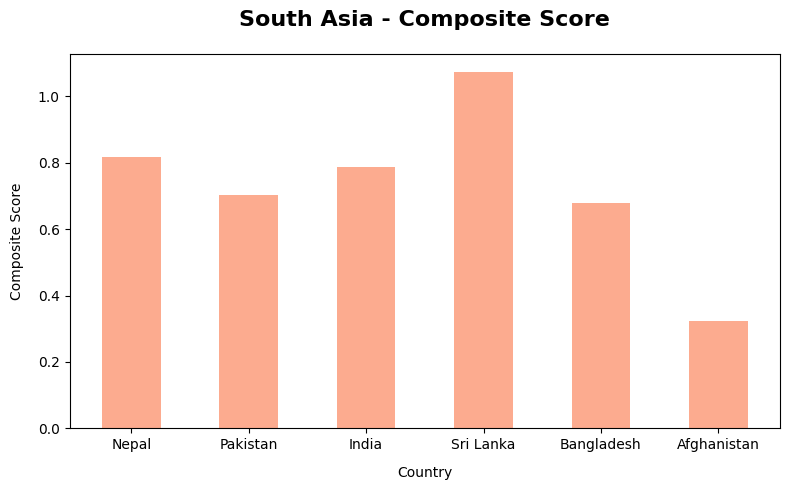

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(south_asia_df['Country name'], south_asia_df['Composite Score'], color=plt.cm.Reds(0.3), width=0.5)
ax.set_xlabel('Country', labelpad=10)
ax.set_ylabel('Composite Score', labelpad=10)
ax.set_title('South Asia - Composite Score', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()
plt.xticks(ha='center', fontsize=10)
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

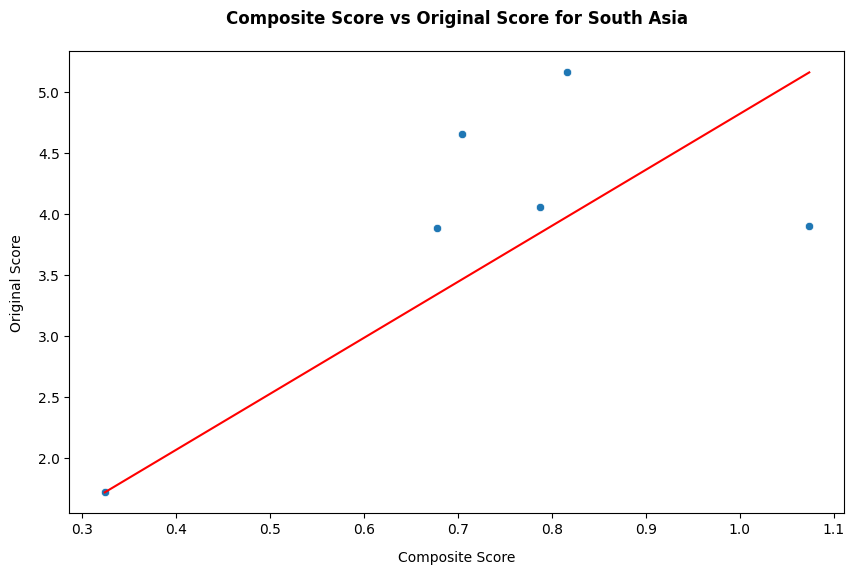

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=south_asia_df, x='Composite Score', y='score')
sns.lineplot(x=[south_asia_df['Composite Score'].min(), south_asia_df['Composite Score'].max()],
             y=[south_asia_df['score'].min(), south_asia_df['score'].max()], color='red')
plt.xlabel('Composite Score', labelpad=10)
plt.ylabel('Original Score', labelpad=10)
plt.title('Composite Score vs Original Score for South Asia', pad=20, fontweight='bold')
plt.show()

Task - 3 - Outlier Detection:

Tasks:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
Quartile1_score = south_asia_df['score'].quantile(0.25)
Quartile3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Quartile3_score - Quartile1_score
lower_score = Quartile1_score - 1.5 * IQR_score
upper_score = Quartile3_score + 1.5 * IQR_score

Quartile1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
Quartile3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Quartile3_gdp - Quartile1_gdp
lower_gdp = Quartile1_gdp - 1.5 * IQR_gdp
upper_gdp = Quartile3_gdp + 1.5 * IQR_gdp

outliers_score = south_asia_df[(south_asia_df['score'] < lower_score) | (south_asia_df['score'] > upper_score)]
outliers_gdp = south_asia_df[(south_asia_df['Log GDP per capita'] < lower_gdp) | (south_asia_df['Log GDP per capita'] > upper_gdp)]
print('Score outliers:', outliers_score['Country name'].tolist())
print('GDP outliers:', outliers_gdp['Country name'].tolist())

Score outliers: ['Afghanistan']
GDP outliers: ['Afghanistan']


2. Define outliers using the 1.5 × IQR rule.

In [ ]:
def find_outliers(series):
    Quartile1 = series.quantile(0.25)
    Quartile3 = series.quantile(0.75)
    IQR = Quartile3 - Quartile1
    lower = Quartile1 - 1.5 * IQR
    upper = Quartile3 + 1.5 * IQR
    return series < lower, series > upper, lower, upper

low_s, high_s, s_low, s_up = find_outliers(south_asia_df["score"])
south_asia_df["Score_Outlier"] = low_s | high_s

low_g, high_g, g_low, g_up = find_outliers(south_asia_df["Log GDP per capita"])
south_asia_df["GDP_Outlier"] = low_g | high_g

score_outliers = south_asia_df[south_asia_df["Score_Outlier"]][["Country name","score"]]
gdp_outliers = south_asia_df[south_asia_df["GDP_Outlier"]][["Country name","Log GDP per capita"]]

score_outliers, gdp_outliers

(    Country name  score
 142  Afghanistan  1.721,
     Country name  Log GDP per capita
 142  Afghanistan               0.628)

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

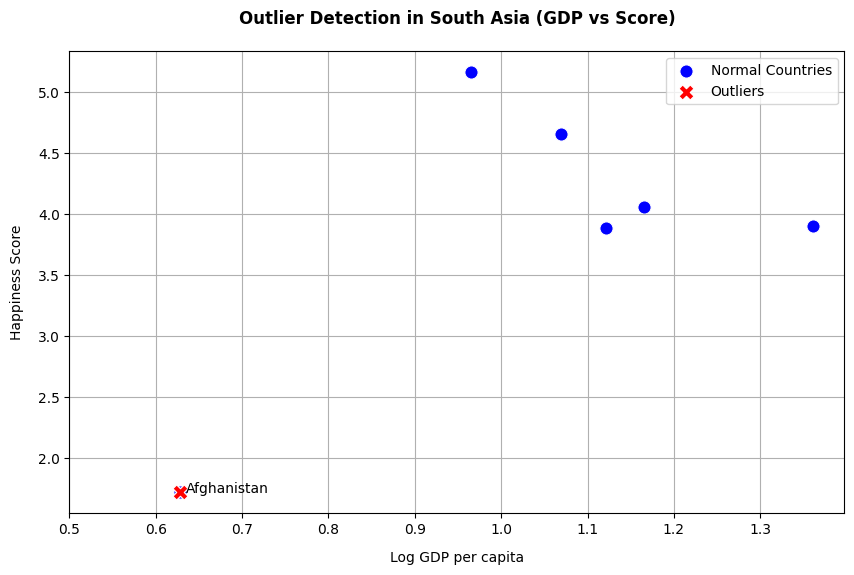

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=south_asia_df, x="Log GDP per capita", y="score", color="blue", s=90, label="Normal Countries")
sns.scatterplot(data=south_asia_df[south_asia_df["GDP_Outlier"] | south_asia_df["Score_Outlier"]],
                x="Log GDP per capita", y="score",color="red", marker="X", s=120, label="Outliers")
for i, row in south_asia_df[south_asia_df["GDP_Outlier"] | south_asia_df["Score_Outlier"]].iterrows():
    plt.text(row["Log GDP per capita"]*1.01, row["score"], row["Country name"])

plt.title("Outlier Detection in South Asia (GDP vs Score)", pad=20, fontweight='bold')
plt.xlabel("Log GDP per capita", labelpad=10)
plt.ylabel("Happiness Score", labelpad=10)
plt.xticks(np.arange(0.5, 1.31, 0.1))
plt.grid(True)
plt.legend()
plt.show()


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

The characterstics of these outliers are:

Values that are extreme, distinctly outliers of the data.

Rare by nature.

Due to mistakes, actual rare events, or a regional specific (e.g. one booming city or a natural disaster).


The impacts on regional averages are:

Powerfully drag the mean away, and usually distort the typical territory.

Blown out variance and standard deviation.

May result in misplaced policy choices (e.g. excessive or insufficient resource allocation).

Task - 4 - Exploring Trends Across Metrics:

Tasks:

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
metrics = ["Freedom to make life choices", "Generosity"]
corr_freedom = south_asia_df["score"].corr(south_asia_df["Freedom to make life choices"])
corr_generosity = south_asia_df["score"].corr(south_asia_df["Generosity"])
print("Freedim correlation with score:", corr_freedom)
print("Generosity correlation with score:", corr_generosity)

Freedim correlation with score: 0.8005185224163315
Generosity correlation with score: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

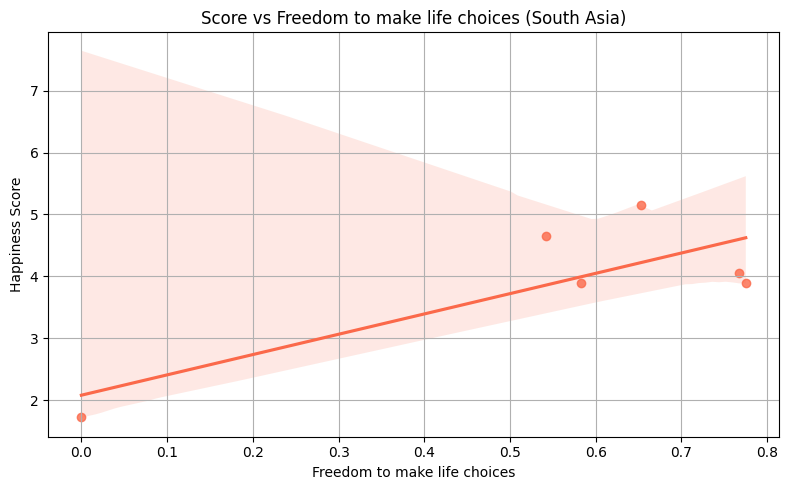

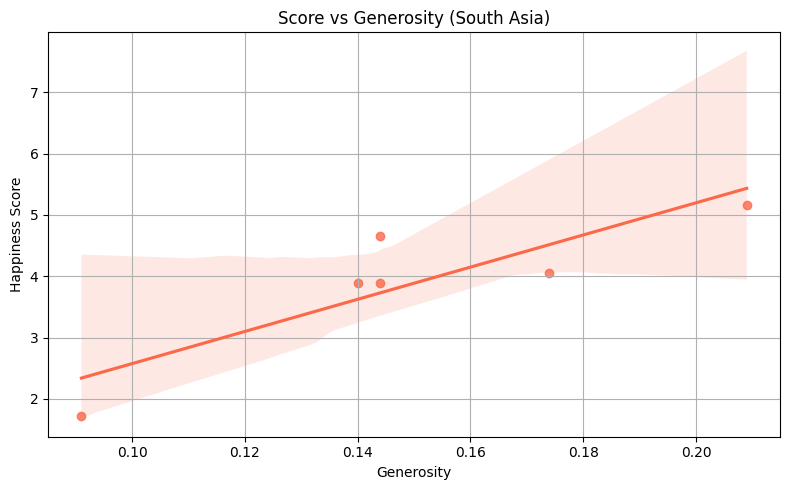

In [ ]:
for matric in metrics:
    plt.figure(figsize=(8,5))
    sns.regplot(data=south_asia_df, x=matric, y="score", color=plt.cm.Reds(0.5))
    plt.title(f"Score vs {matric} (South Asia)")
    plt.xlabel(matric)
    plt.ylabel("Happiness Score")
    plt.tight_layout()
    plt.grid(True)
    plt.show()


3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

-The stronger relationship between these matrics:

In case of Freedom greater than Generosity correlation, then:

The relationship between freedom to make life choices and happiness is highest in South Asia.

The more personal freedom, the higher score of happiness is always achieved by a country.

-The weakest relationship between these matrics:
Generosity tends to exhibit a loose or weak correlation.

Generosity may be influenced by culture in the reporting.

It is not constant and lacks a close relationship with happiness.

Cultural norms affect generosity and it may not be directly proportional to the quality of life.

Task - 5 - Gap Analysis:

Tasks:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

In [ ]:
south_asia_df["GDP-Score Gap"] = south_asia_df["Log GDP per capita"] - south_asia_df["score"]
south_asia_df[["Country name", "Log GDP per capita", "score", "GDP-Score Gap"]]


,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764
142,Afghanistan,0.628,1.721,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
ascending_gap = south_asia_df.sort_values("GDP-Score Gap")[["Country name","GDP-Score Gap"]]
descending_gap = south_asia_df.sort_values("GDP-Score Gap", ascending=False)[["Country name","GDP-Score Gap"]]

print("South asian countries rank in ascending order\n", ascending_gap)
print("South asian countries rank in descending order\n", descending_gap)


South asian countries rank in ascending order
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
South asian countries rank in descending order
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

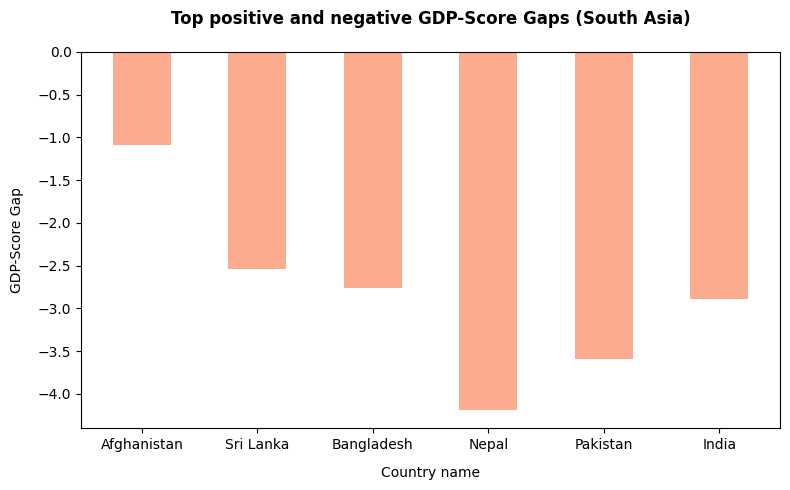

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
subset = pd.concat([descending_gap.head(3), ascending_gap.head(3)])
ax.bar(subset['Country name'], subset['GDP-Score Gap'], width=0.5, color=plt.cm.Reds(0.3))
ax.set_title('Top positive and negative GDP-Score Gaps (South Asia)', pad=20, fontweight='bold')
ax.set_xlabel('Country name', labelpad=10)
ax.set_ylabel('GDP-Score Gap', labelpad=10)
plt.xticks(fontsize=10, ha='center')
plt.tight_layout()
plt.show()

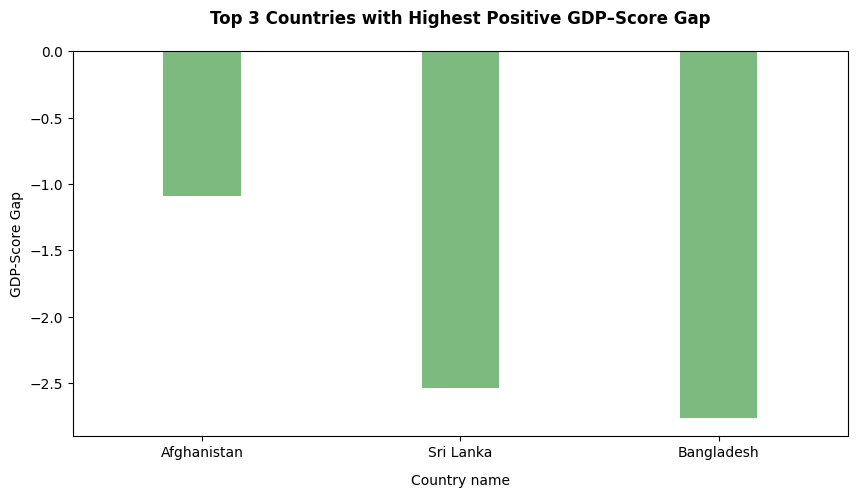

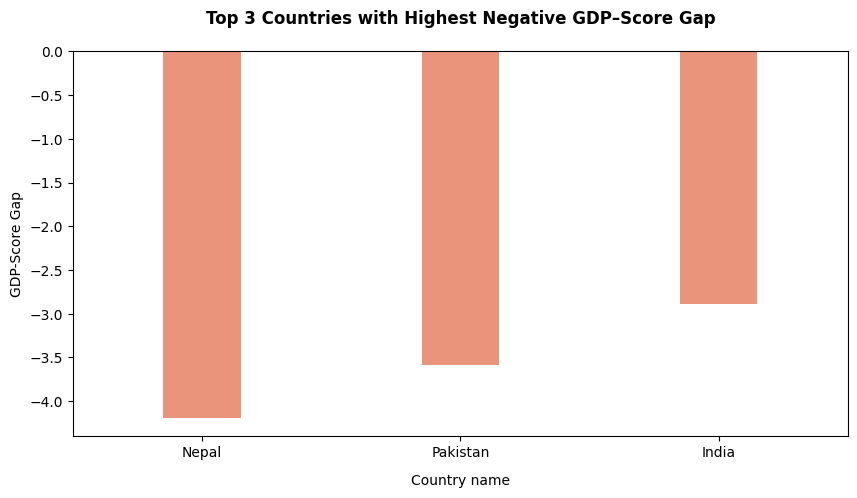

In [ ]:
top3_countires_positive = descending_gap.head(3)
top3_countries_negative = ascending_gap.head(3)

plt.figure(figsize=(10,5))
sns.barplot(data=top3_countires_positive, x="Country name", y="GDP-Score Gap", width=0.3, color=plt.cm.Greens(0.5))
plt.title("Top 3 Countries with Highest Positive GDP–Score Gap", pad=20, fontweight='bold')
plt.xlabel("Country name", labelpad=10)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=top3_countries_negative, x="Country name", y="GDP-Score Gap", width=0.3, color=plt.cm.Reds(0.4))
plt.title("Top 3 Countries with Highest Negative GDP–Score Gap", pad=20, fontweight='bold')
plt.xlabel("Country name", labelpad=10)
plt.show()


4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Positive gap (GDP >> Score):

The nation has a higher economic power but its score in the happiness index fails to reflect their economic prosperity.

Poor governance, inequality, social instability and low freedom levels.

Negative gap (Score >> GDP):

Poorer countries, nevertheless, are happier.

Often due to Strong community bonds, high social support, cultural resilience.

3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                         "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()
middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


Complete the following task:

1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?


In [ ]:
mean_south_asia = south_asia_df['score'].mean()
std_south_asia = south_asia_df['score'].std()
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()
print(f"South Asia - Mean: {mean_south_asia:.2f}, Std: {std_south_asia:.2f}")
print(f"Middle East - Mean: {mean_middle_east:.2f}, Std: {std_middle_east:.2f}")
if mean_south_asia > mean_middle_east:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

South Asia - Mean: 3.90, Std: 1.18
Middle East - Mean: 5.41, Std: 1.57
Middle East has higher happiness scores on average.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.


In [ ]:
top3_south_asia = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom3_south_asia = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]
top3_middle_east = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom3_middle_east = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]
print("Top and bottom three countries in South Asia:")
print(top3_south_asia)
print(bottom3_south_asia)
print("Top and bottom three countries in Middle East:")
print(top3_middle_east)
print(bottom3_middle_east)

Top and bottom three countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Top and bottom three countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


• Plot bar charts comparing these charts.

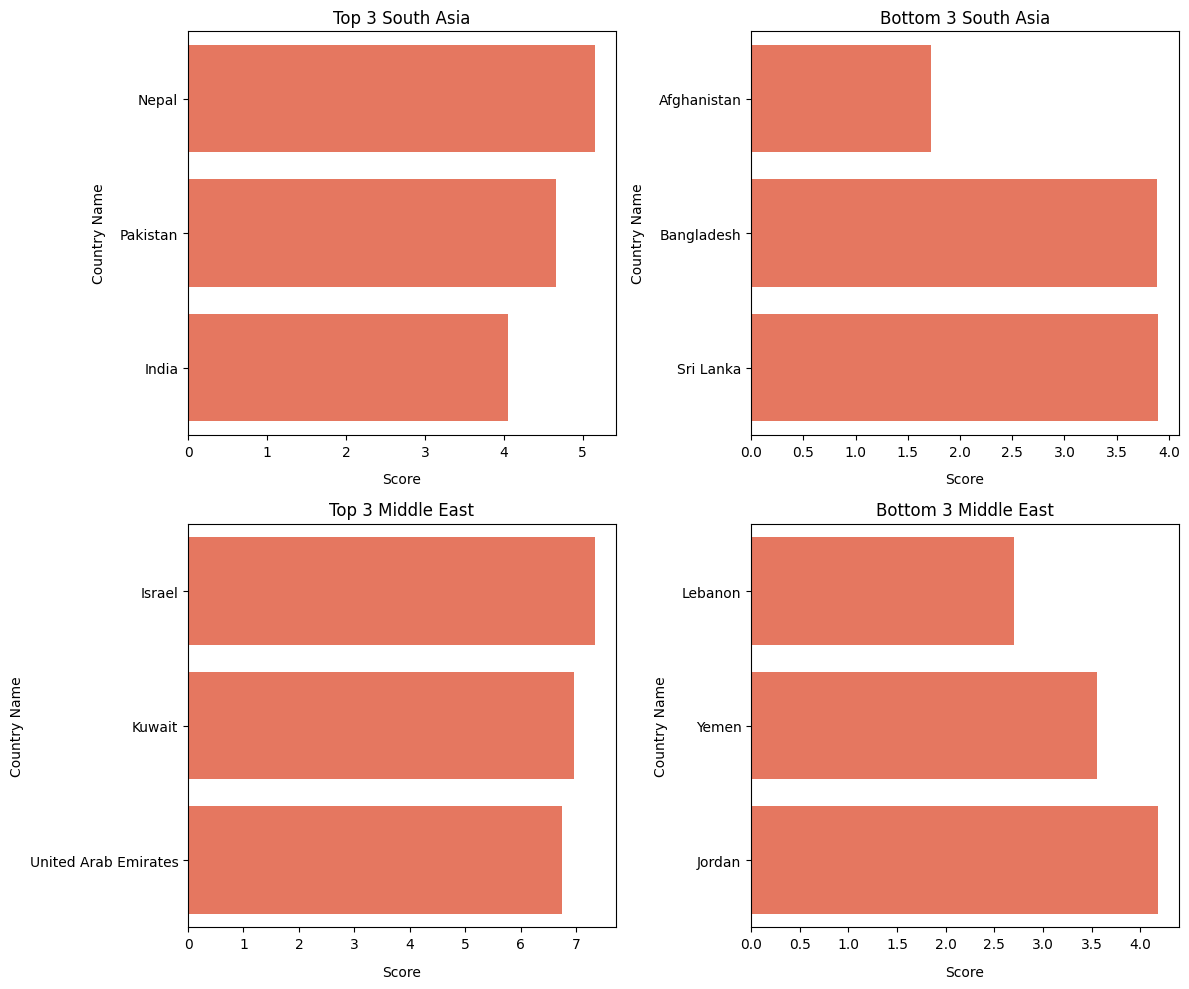

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.barplot(data=top3_south_asia, x='score', y='Country name', ax=axes[0,0], color=plt.cm.Reds(0.5))
axes[0,0].set_title('Top 3 South Asia')
axes[0,0].set_ylabel('Country Name', labelpad=10)
axes[0,0].set_xlabel('Score', labelpad=10)

sns.barplot(data=bottom3_south_asia, x='score', y='Country name', ax=axes[0,1], color=plt.cm.Reds(0.5))
axes[0,1].set_title('Bottom 3 South Asia')
axes[0,1].set_ylabel('Country Name', labelpad=10)
axes[0,1].set_xlabel('Score', labelpad=10)

sns.barplot(data=top3_middle_east, x='score', y='Country name', ax=axes[1,0], color=plt.cm.Reds(0.5))
axes[1,0].set_title('Top 3 Middle East')
axes[1,0].set_ylabel('Country Name')
axes[1,0].set_xlabel('Score', labelpad=10)

sns.barplot(data=bottom3_middle_east, x='score', y='Country name', ax=axes[1,1], color=plt.cm.Reds(0.5))
axes[1,1].set_title('Bottom 3 Middle East')
axes[1,1].set_ylabel('Country Name', labelpad=10)
axes[1,1].set_xlabel('Score', labelpad=10)
plt.tight_layout()
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

In [ ]:
metrics = ["Log GDP per capita", "Social support", "Healthy life expectancy"]
south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({"Metric": metrics, "South Asia": south_asia_means.values, "Middle East": middle_east_means.values})
comparison_df


,Metric,South Asia,Middle East
0,Log GDP per capita,1.051833,1.496333
1,Social support,0.611833,1.152778
2,Healthy life expectancy,0.420333,0.554111


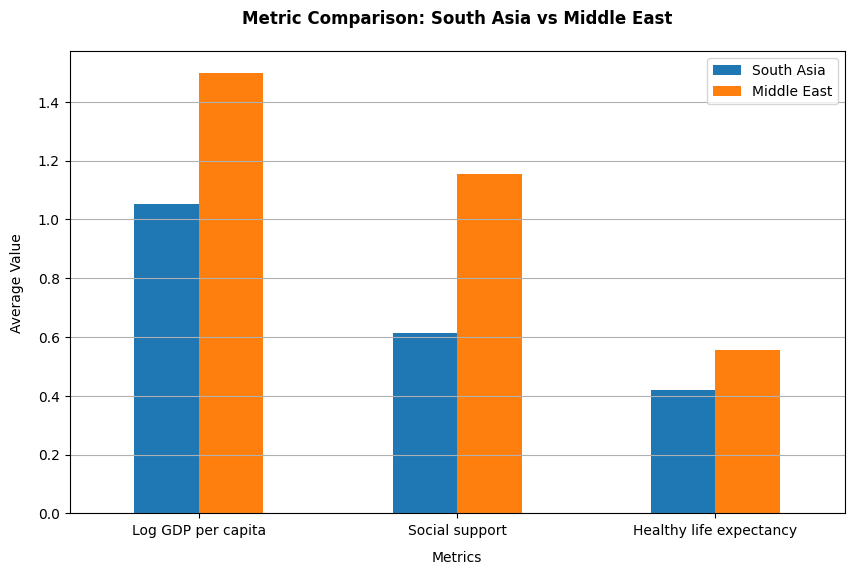

In [ ]:
comparison_df.set_index("Metric").plot(kind="bar", figsize=(10,6))
plt.xlabel("Metrics", labelpad=10)
plt.ylabel("Average Value", labelpad=10)
plt.title("Metric Comparison: South Asia vs Middle East", pad=20, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


• Which metrics show the largest disparity between the two regions?

1. Log GDP per Capita shows the largest gap.

2. Middle East has largest disparity South Asia across all metrics.

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
south_asia_range = south_asia_df["score"].max() - south_asia_df["score"].min()
middle_east_range = middle_east_df["score"].max() - middle_east_df["score"].min()
south_asia_cv = std_south_asia / mean_south_asia
middle_east_cv = std_middle_east / mean_middle_east
print("South asia range:", south_asia_range)
print("Middle east range:", middle_east_range)
print("South asia CV:", south_asia_cv)
print("Middle east CV:", middle_east_cv)


South asia range: 3.4370000000000003
Middle east range: 4.634
South asia CV: 0.3021482883337427
Middle east CV: 0.28938880812119405


• Which region has greater variability in happiness?

 South asia has greater variablility in happiness. Although south asian countries have the lower overall score but the variability has been the highest among these two region.

5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

In [ ]:
corr_sa_freedom = south_asia_df["score"].corr(south_asia_df["Freedom to make life choices"])
corr_sa_generosity = south_asia_df["score"].corr(south_asia_df["Generosity"])

corr_me_freedom = middle_east_df["score"].corr(middle_east_df["Freedom to make life choices"])
corr_me_generosity = middle_east_df["score"].corr(middle_east_df["Generosity"])

print("Correlation between Score and Freedom to Make Life Choices in South Asia:", corr_sa_freedom)
print("\nCorrelation between Score and Generosity in South Asia:", corr_sa_generosity)
print("\nCorrelation between Score and Freedom to Make Life Choices in Middle East:", corr_me_freedom)
print("\nCorrelation between Score and Generosity in Middle East:", corr_me_generosity)




Correlation between Score and Freedom to Make Life Choices in South Asia: 0.8005185224163315

Correlation between Score and Generosity in South Asia: 0.874512371253192

Correlation between Score and Freedom to Make Life Choices in Middle East: 0.8632202433827544

Correlation between Score and Generosity in Middle East: 0.6275236536964182


• Create scatter plots to visualize and interpret the relationships.

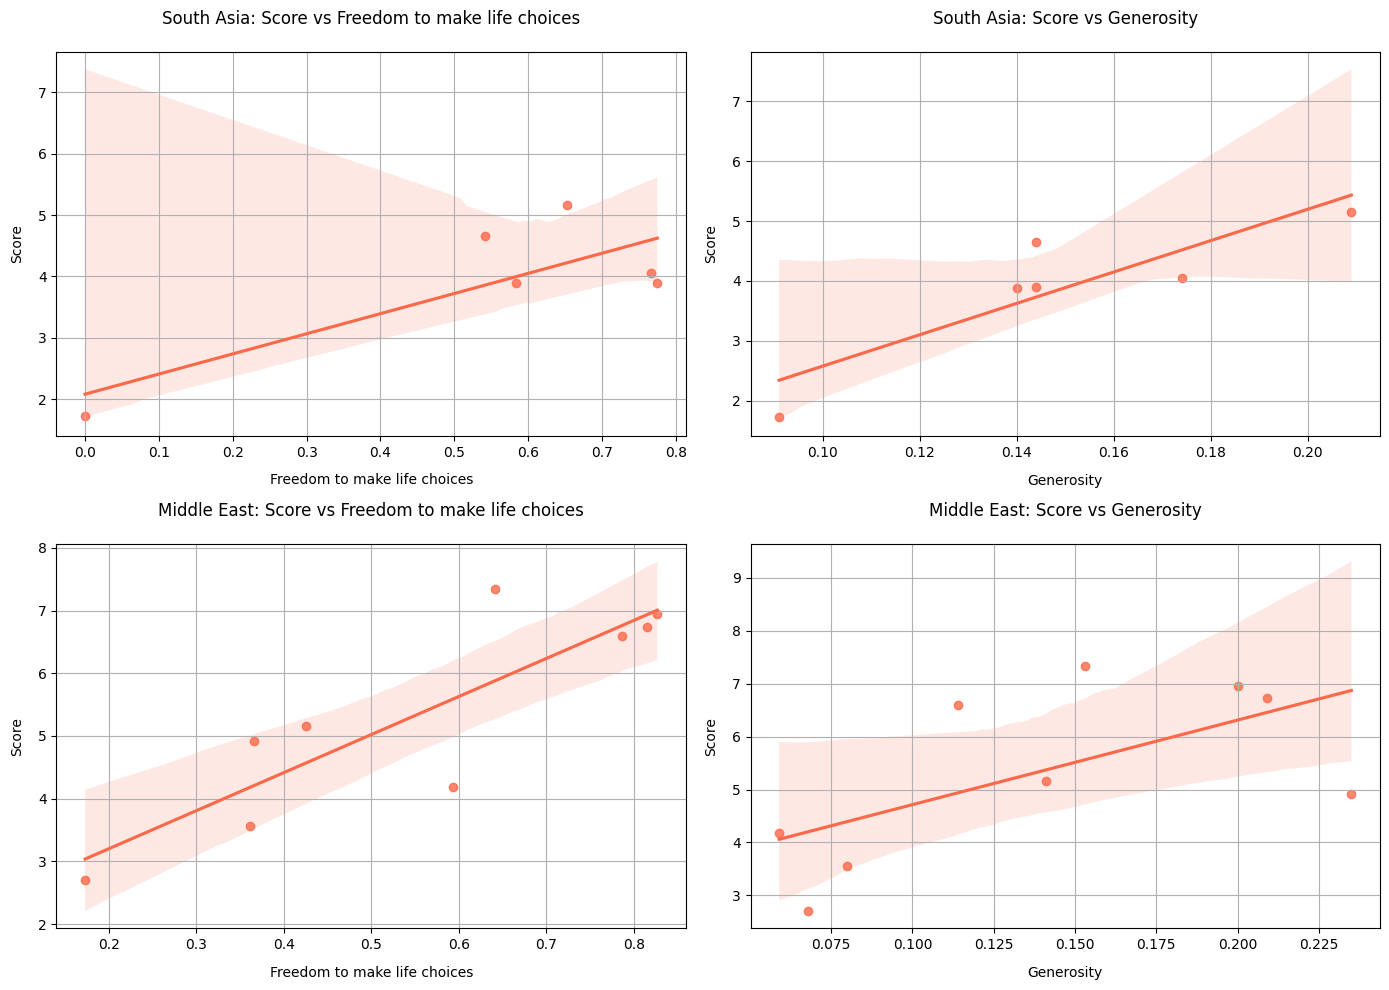

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.regplot(data=south_asia_df, x="Freedom to make life choices", y="score", ax=axes[0, 0], color=plt.cm.Reds(0.5))
axes[0, 0].set_title("South Asia: Score vs Freedom to make life choices", pad=20)
axes[0, 0].set_xlabel("Freedom to make life choices", labelpad=10)
axes[0,0].set_ylabel("Score", labelpad=10)
axes[0, 0].grid(True)

sns.regplot(data=south_asia_df, x="Generosity", y="score", ax=axes[0, 1], color=plt.cm.Reds(0.5))
axes[0, 1].set_title("South Asia: Score vs Generosity", pad=20)
axes[0, 1].set_xlabel("Generosity", labelpad=10)
axes[0, 1].set_ylabel("Score", labelpad=10)
axes[0, 1].grid(True)

sns.regplot(data=middle_east_df, x="Freedom to make life choices", y="score", ax=axes[1, 0], color=plt.cm.Reds(0.5))
axes[1, 0].set_title("Middle East: Score vs Freedom to make life choices", pad=20)
axes[1, 0].set_xlabel("Freedom to make life choices", labelpad=10)
axes[1, 0].set_ylabel("Score", labelpad=10)
axes[1, 0].grid(True)

sns.regplot(data=middle_east_df, x="Generosity", y="score", ax=axes[1, 1], color=plt.cm.Reds(0.5))
axes[1, 1].set_title("Middle East: Score vs Generosity", pad=20)
axes[1, 1].set_xlabel("Generosity", labelpad=10)
axes[1, 1].set_ylabel("Score", labelpad=10)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

In [ ]:
Quartile1_south_asia_score = south_asia_df["score"].quantile(0.25)
Quartile3_south_asia_score = south_asia_df["score"].quantile(0.75)
IQR_sa_score = Quartile3_south_asia_score - Quartile1_south_asia_score
lower_sa_score = Quartile1_south_asia_score - 1.5 * IQR_sa_score
upper_sa_score = Quartile3_south_asia_score + 1.5 * IQR_sa_score
out_sa_score = (south_asia_df["score"] < lower_sa_score) | (south_asia_df["score"] > upper_sa_score)

Quartile1_south_asia_gdp = south_asia_df["Log GDP per capita"].quantile(0.25)
Quartile3_south_asia_gdp = south_asia_df["Log GDP per capita"].quantile(0.75)
IQR_sa_gdp = Quartile3_south_asia_gdp - Quartile1_south_asia_gdp
lower_sa_gdp = Quartile1_south_asia_gdp - 1.5 * IQR_sa_gdp
upper_sa_gdp = Quartile3_south_asia_gdp + 1.5 * IQR_sa_gdp
out_sa_gdp = (south_asia_df["Log GDP per capita"] < lower_sa_gdp) | (south_asia_df["Log GDP per capita"] > upper_sa_gdp)

south_asia_df["Outlier"] = out_sa_score | out_sa_gdp

sa_outliers = south_asia_df[south_asia_df["Outlier"]][["Country name","score","Log GDP per capita"]]
print("South asia outliers:\n", sa_outliers)


South asia outliers:
     Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [ ]:
Quartile1_middle_east_score = middle_east_df["score"].quantile(0.25)
Quartile3_middle_east_score = middle_east_df["score"].quantile(0.75)
IQR_me_score = Quartile3_middle_east_score - Quartile1_middle_east_score
lower_me_score = Quartile1_middle_east_score - 1.5 * IQR_me_score
upper_me_score = Quartile3_middle_east_score + 1.5 * IQR_me_score
out_me_score = (middle_east_df["score"] < lower_me_score) | (middle_east_df["score"] > upper_me_score)

Quartile1_middle_east_gdp = middle_east_df["Log GDP per capita"].quantile(0.25)
Quartile3_middle_east_gdp = middle_east_df["Log GDP per capita"].quantile(0.75)
IQR_me_gdp = Quartile3_middle_east_gdp - Quartile1_middle_east_gdp
lower_me_gdp = Quartile1_middle_east_gdp - 1.5 * IQR_me_gdp
upper_me_gdp = Quartile3_middle_east_gdp + 1.5 * IQR_me_gdp
out_me_gdp = (middle_east_df["Log GDP per capita"] < lower_me_gdp) | (middle_east_df["Log GDP per capita"] > upper_me_gdp)

middle_east_df["Outlier"] = out_me_score | out_me_gdp

me_outliers = middle_east_df[middle_east_df["Outlier"]][["Country name","score","Log GDP per capita"]]
print("Middle east outliers:\n", me_outliers)


Middle east outliers:
 Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


• Plot these outliers and discuss their implications.

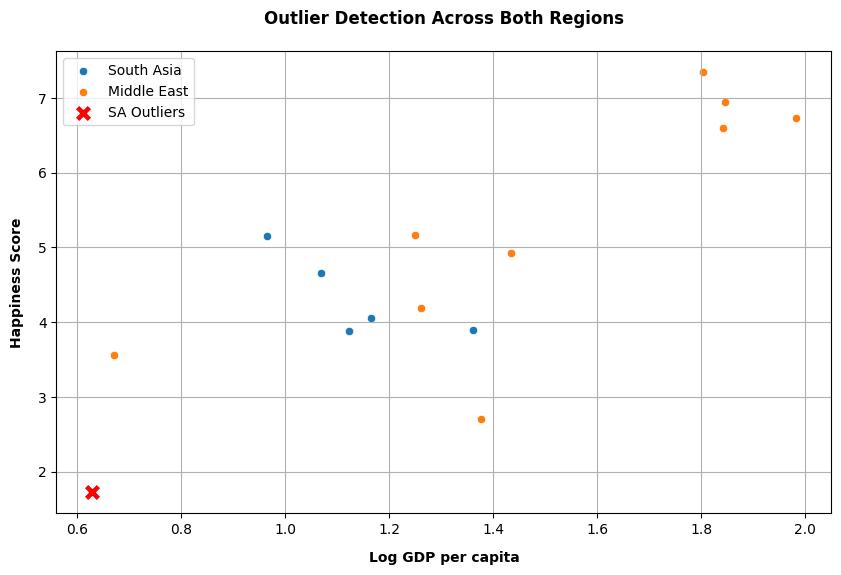

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=south_asia_df, x="Log GDP per capita", y="score", label="South Asia")
sns.scatterplot(data=middle_east_df, x="Log GDP per capita", y="score", label="Middle East")

sns.scatterplot(data=sa_outliers, x="Log GDP per capita", y="score", color="red", marker="X", s=150, label="SA Outliers")
sns.scatterplot(data=me_outliers, x="Log GDP per capita", y="score", color="black", marker="X", s=150, label="ME Outliers")

plt.title("Outlier Detection Across Both Regions", pad=20, fontweight='bold')
plt.xlabel("Log GDP per capita", labelpad=10, fontweight='bold')
plt.ylabel("Happiness Score", labelpad=10, fontweight='bold')
plt.grid(True)
plt.show()


7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

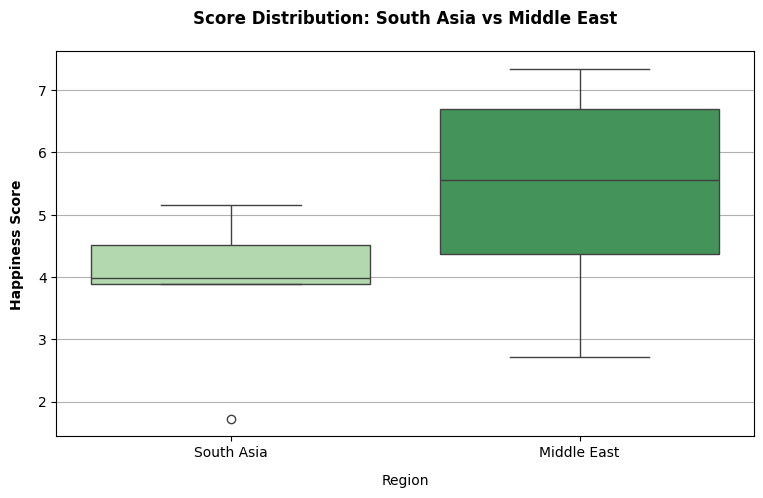

In [ ]:
south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'
combined_df = pd.concat([south_asia_df[['score', 'Region']], middle_east_df[['score', 'Region']]])

plt.figure(figsize=(9,5))
sns.boxplot(data=combined_df, x='Region', y='score', hue='Region', palette="Greens")
plt.xlabel("Region", labelpad=10)
plt.ylabel("Happiness Score", labelpad=10, fontweight='bold')
plt.title("Score Distribution: South Asia vs Middle East", pad=20, fontweight='bold')
plt.grid(axis='y')
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.

According to South Asia countries:

1. They have wider ranges.

2. Have higher medians and have low-end outliers.


According to Middle East countries:

1. They have lower medians and closer clustering.

2. They have higher varablility.
